## Notebook to troubleshoot MCMC trace decoder

In [1]:
# import packages
import numpy as np
from matplotlib import pyplot as plt
from init_mcmc_multi_state import init_mcmc
from trace_simulators import simulate_traces
from numpy import linalg as LA

### Define system parameters

In [22]:
# transition and emission arrays
A = np.array([[.9, .3, 0],
              [.1, .5, .5],
              [0, .2, .5]])

e = np.array([[.9,.1,0],
              [.1,.8,.2],
              [0,.1,.8]])

# basic trace parameters
memory = 7*10 # number of time steps for Pol II to teranscribe gene
dT = 20 # time resolution of experimental data
tau = 2 # minimum time scale of the system
cv_factor = int(dT/tau)
# Fix trace length for now
trace_len = 100 # length of simulated trace (time steps)
# Number of traces per batch
sigma = 20 # stdev of Gaussian noise
r = 20 
alpha = 14
# set priors
a_prior = np.ones((3, 3))
e_prior = np.ones((3, 3))
pi0_prior = np.ones((3))

### Simulate trace

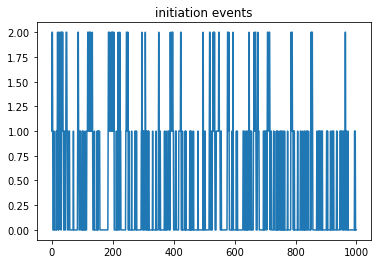

In [23]:
#fluo_noise, fluo_raw, fluo_unif, system_states, initiation_states \
#    = simulate_traces(tau, dT, memory, trace_len, A, e, r, sigma, alpha)

fluo_noise, fluo_raw, fluo_unif, system_states, initiation_states = \
simulate_traces(tau,dT,memory,trace_len,A,e,r,sigma,alpha)

#fig1, ax1 = plt.subplots()
#ax1.plot(fluo_noise)
#ax1.set_title("Observed fluorescence (simulated)")
#ax1.set_xlabel("time")
#ax1.set_ylabel("fluorescence (au)")

fig2, ax2 = plt.subplots()
ax2.set_title("initiation events")
ax2.plot(initiation_states)

## Call fitting function

In [24]:
n_steps = 200
logL_list, e_array_list, a_array_list, pi0_array_list = \
   init_mcmc([initiation_states], a_prior, e_prior, pi0_prior, n_steps=n_steps, burn_in=1)

## Track trends in learning (or lack thereof)

Text(0.5, 0, 'iteration')

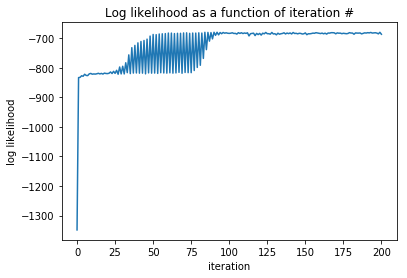

In [25]:
fig1, ax1 = plt.subplots()
ax1.plot(logL_list)
ax1.set_title("Log likelihood as a function of iteration #")
ax1.set_ylabel("log likelihood")
ax1.set_xlabel("iteration")

(array([ 6., 15., 20.,  8., 20., 12.,  4.,  6.,  5.,  5.]),
 array([1.24996346, 1.29244313, 1.33492281, 1.37740248, 1.41988215,
        1.46236183, 1.5048415 , 1.54732118, 1.58980085, 1.63228053,
        1.6747602 ]),
 <a list of 10 Patch objects>)

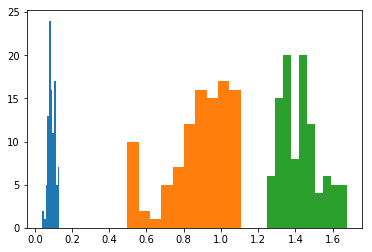

In [26]:
burn_in = 100

p0_vec = [np.matmul(p0[:,0],[0,1,2]) for p0 in e_array_list[burn_in:]]
p1_vec = [np.matmul(p1[:,1],[0,1,2]) for p1 in e_array_list[burn_in:]]
p2_vec = [np.matmul(p2[:,2],[0,1,2]) for p2 in e_array_list[burn_in:]]


plt.hist(p1_vec)
plt.hist(p2_vec)
plt.hist(p0_vec)

In [27]:
print(a_array_list[-1])
print(e_array_list[-1])

[[0.70238069 0.01707076 0.14725984]
 [0.05182794 0.89311898 0.59795996]
 [0.24579137 0.08981026 0.25478021]]
[[0.01773144 0.89501284 0.10690104]
 [0.56509571 0.10270597 0.72745721]
 [0.41717284 0.00228119 0.16564174]]


(array([ 2.,  7.,  2.,  5.,  4., 23., 17., 19., 17.,  5.]),
 array([0.76388815, 0.78122944, 0.79857073, 0.81591202, 0.83325331,
        0.8505946 , 0.86793589, 0.88527718, 0.90261847, 0.91995975,
        0.93730104]),
 <a list of 10 Patch objects>)

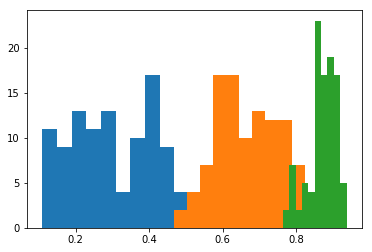

In [28]:
a0_vec = [a0[2,2] for a0 in a_array_list[burn_in:]]
a1_vec = [a1[0,0] for a1 in a_array_list[burn_in:]]
a2_vec = [a2[1,1] for a2 in a_array_list[burn_in:]]

plt.hist(a0_vec)
plt.hist(a1_vec)
plt.hist(a2_vec)


In [ ]:
t = 210
print(a_array_list[t])
print(p_array_list[t])

In [ ]:
print((p_array_list[t][1,:]))
print(np.argsort(p_array_list[t][1,:]))

In [ ]:
idx = np.argsort(p_array_list[t][0,:])
a = p_array_list[t]            
print(a)
b = a[idx,:]
print(b[:,idx])